<a href="https://colab.research.google.com/github/MatthewSmith22/BigDataTechnologyHW/blob/master/MatthewSmith_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

# **Problem 1**
In the "Classifying movie reviews" example explained in Lecture 8, do the following experiments to see the new results (accuracy, loss, and training time) and summarize your observations.

In [0]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [0]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512, verbose = 0)
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3051 - accuracy: 0.8795


In [0]:
results

[0.305146187543869, 0.8794800043106079]

# Part 1 
Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.

One hidden layer:

In [0]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=4, batch_size=512, verbose = 0)
results1 = model1.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.2807 - accuracy: 0.8871


After running the neural network with 1 hidden layer instead of 2, the accuracy slightly increased from 0.8795 to 0.8871, while the loss decreased from 0.3051 to 0.2807. The training time remained the same. It appears that going with 1 hidden layer is better than 2 hidden layers.

# Part 2
Try to use layers with more hidden units or less hidden units: 32 units or 64 units.

32 hidden units:

In [0]:
model32 = models.Sequential()
model32.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model32.add(layers.Dense(32, activation='relu'))
model32.add(layers.Dense(1, activation='sigmoid'))

model32.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model32.fit(x_train, y_train, epochs=4, batch_size=512, verbose = 0)
results32 = model32.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3343 - accuracy: 0.8728


After running a neural network with 32 hidden layers instead of 16, the accuracy decreased from 0.8795 to 0.8728, while the loss increased from 0.3051 to 0.3343. The training time remainded the same. Here it appears better to stick with 16 hidden units as opposed to 32 hidden units.

# Part 3
Try to use the *mse* loss funtion instead of *binary_crossentropy*.

In [0]:
model_mse = models.Sequential()
model_mse.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_mse.add(layers.Dense(16, activation='relu'))
model_mse.add(layers.Dense(1, activation='sigmoid'))

model_mse.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model_mse.fit(x_train, y_train, epochs=4, batch_size=512, verbose = 0)
results_mse = model_mse.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.0959 - accuracy: 0.8702


After running a neural network with the mse loss function instead of the binary_crossentropy, the accuracy decreased from 0.8795 to 0.8702, and the loss decreased from 0.3108 to 0.0882. The training time remained the same.

# Part 4
Try to use the *tanh* activation function (an activation that was popular in the early days of neural networks) instead of *relu*.

In [0]:
model_tanh = models.Sequential()
model_tanh.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model_tanh.add(layers.Dense(16, activation='tanh'))
model_tanh.add(layers.Dense(1, activation='sigmoid'))

model_tanh.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_tanh.fit(x_train, y_train, epochs=4, batch_size=512, verbose = 0)
results_tanh = model_tanh.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3289 - accuracy: 0.8757


After running a neural network with the tanh activation function, the accuracy decreased from 0.8795 to 0.8757, while the loss increased from 0.3051 to 0.3289. The training time remained the same. 

# **Problem 2**
Write Pyhon code in Colab using NumPy, Pandas, Scikit-Learn and Keras to complete the following tasks:

# Part 1
Use Pandas to immport the following auto-mpg.data, drop the rows with unknown values ("?"), convert the "Origin" column into numeric one with one-hot encoding.

In [0]:
from tensorflow.keras import backend as K

# Some memory clean-up
K.clear_session()

In [0]:
auto = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', sep= ' ', header = None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin'],
                   skipinitialspace = True, na_values = '?', comment = '\t')

In [0]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [0]:
auto.shape

(398, 8)

In [0]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [0]:
auto2 = auto.dropna()

In [0]:
auto2.shape

(392, 8)

In [0]:
auto_new = pd.get_dummies(auto2, columns=["origin"])

In [0]:
auto_new.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


# Part 2
Split the dataset into 80%-training and 20%-test and separate the fuel efficiency column (label) from other columns (features).

In [0]:
X_col = auto_new.columns.drop('mpg')
X = auto_new[X_col].values
y = auto_new['mpg'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, train_size = 0.8)

# Part 3
Check statistics of each feature column and normalize the feature columns so that their mean is zero and variance is one.

In [0]:
auto_new.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.625000,0.173469,0.201531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.484742,0.379136,0.401656
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [0]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

# Part 4
Build a Sequential model in Keras with two densely connected hidden layers (32 neurons and 'relu' activation function for each hidden layer), and an output layer that returns a single, continuous value. You need to select your own loss function, optimizer, and metrics for theis specific problem.

In [0]:
model_auto = models.Sequential()
model_auto.add(layers.Dense(32, activation='relu',
                           input_shape=(X_train.shape[1],)))
model_auto.add(layers.Dense(32, activation='relu'))
model_auto.add(layers.Dense(1))
model_auto.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Part 5
Put aside 20% of the training data as the validation dataset. Train the model for 500 epochs, and plot the training and validation loss and accuracy progresses with respect to the epoch number.

In [0]:
x_val, partial_x_train = np.split(X_train, [int(0.2 * len(X_train))])
y_val, partial_y_train = np.split(y_train, [int(0.2 * len(y_train))])

In [0]:
x_val.shape

(62, 9)

In [0]:
partial_x_train.shape

(251, 9)

In [0]:
X_train.shape

(313, 9)

In [0]:
X_test.shape

(79, 9)

In [0]:
y_val.shape

(62,)

In [0]:
history_auto = model_auto.fit(partial_x_train,
                    partial_y_train,
                    epochs=500,
                    batch_size=8,
                    validation_data=(x_val, y_val))

Epoch 1/500
32/32 [==============================] - 0s 3ms/step - loss: 0.9579 - mae: 0.6427 - val_loss: 3.2949 - val_mae: 1.1735
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 0.7332 - mae: 0.5986 - val_loss: 3.4167 - val_mae: 1.2192
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 0.9616 - mae: 0.5796 - val_loss: 5.5462 - val_mae: 1.5579
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.9455 - mae: 0.6070 - val_loss: 4.5083 - val_mae: 1.3823
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.8012 - mae: 0.5671 - val_loss: 3.2748 - val_mae: 1.2084
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 0.8509 - mae: 0.6207 - val_loss: 4.0944 - val_mae: 1.3049
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.7945 - mae: 0.5841 - val_loss: 4.6433 - val_mae: 1.3293
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 0.8779 - m

In [0]:
history_dict = history_auto.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

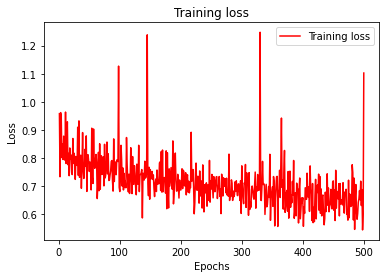

In [0]:
import matplotlib.pyplot as plt

mae = history_auto.history['mae']
val_mae = history_auto.history['val_mae']
loss = history_auto.history['loss']
val_loss = history_auto.history['val_loss']

epochs = range(1, len(mae) + 1)


plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

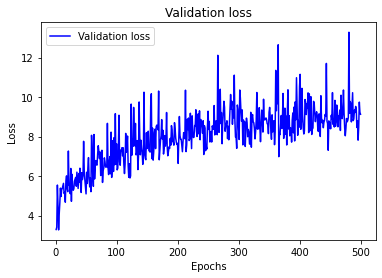

In [0]:
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

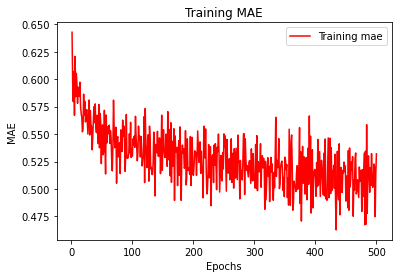

In [0]:
plt.clf()   # clear figure
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

plt.plot(epochs, mae, 'r', label='Training mae')
plt.title('Training MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

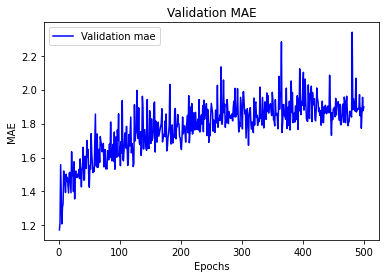

In [0]:
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

# Part 6
Select the best number of epochs and the hyperparameter as check the performance of the learned model on the testing data.

In [0]:
model_auto.fit(X_train, y_train,
          epochs=20, batch_size=8, verbose=0)
test_mse_score, test_mae_score = model_auto.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 15.9065 - mae: 2.7683


In [0]:
test_mae_score

2.7682764530181885

In [0]:
model_auto.fit(X_train, y_train,
          epochs=10, batch_size=8, verbose=0)
test_mse_score, test_mae_score = model_auto.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 14.3439 - mae: 2.7101


In [0]:
test_mae_score

2.7101058959960938